#  Diamond Price Prediction - Linear Regression 

## Project Overview

You are a data scientist helping your jeweler friend automate the diamond valuation process in their busy jewelry store. With an overwhelming number of customers bringing diamonds to sell, manual assessment has become impractical. Your mission is to build a machine learning model that can accurately predict diamond prices based on their physical properties.

## Business Context

Your friend's jewelry store faces a critical challenge:
- **High Volume**: Too many customers to assess each diamond manually
- **Time Constraints**: Other business responsibilities limit valuation time
- **Need for Accuracy**: Incorrect valuations could lead to significant financial losses
- **Solution**: Automated ML-based valuation system using historical data

## Dataset Description

The historical diamond valuation data contains the following features:

### Physical Measurements
- **`carat`**: Physical mass of the diamond (1 carat = 0.20 grams)
- **`x`**: Length in mm
- **`y`**: Width in mm  
- **`z`**: Depth in mm
- **`depth`**: Height from sphere to table in mm
- **`table`**: Width of top surface relative to widest point (affects brilliance)

### Quality Indicators
- **`cut`**: Quality of the cut (affects light reflection and eye appeal)
- **`color`**: Color grade from D (best) to J (worst)
- **`clarity`**: Presence of blemishes
  - Scale: IF (best) → VVS1 → VVS2 → VS1 → VS2 → SI1 → SI2 → I1 (worst)

### Target Variable
- **`price`**: Diamond price in USD

## Project Objectives

1. **Data Analysis**: Understand the relationships between diamond features and prices
2. **Data Cleaning**: Handle missing values, outliers, and irrelevant features
3. **Feature Engineering**: Select the most predictive features for the model
4. **Model Development**: Build a linear regression model for price prediction
5. **Model Evaluation**: Assess model performance on test data
6. **Deliverable**: A cleaned dataset and trained model for automated diamond valuation

## Expected Outcomes

By the end of this project, you will have:
- A thoroughly analyzed and cleaned diamond dataset
- Insights into which diamond features most influence price
- A trained linear regression model capable of predicting diamond prices
- A reusable dataset for future model development

In [34]:
#----------------------------------------
# Import necessary libraries
#----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

#----------------------------------------
# Load the data
#----------------------------------------
diamonds_df = pd.read_csv('diamonds.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [35]:
#----------------------------------------
# Data set display
#----------------------------------------
print("═" * 50)
print("FIRST 12 ROWS OF DATASET:")
print("═" * 50)
diamonds_df.head(10)

══════════════════════════════════════════════════
FIRST 12 ROWS OF DATASET:
══════════════════════════════════════════════════


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [36]:
#----------------------------------------
# Basic information about the dataset
#----------------------------------------
print("\n" + "═" * 50)
print("BASIC INFORMATION ABOUT THE DATASET:")
print("═" * 50)
print(f"\nDataset dimensions: {diamonds_df.shape}")
print(f"Number of rows: {diamonds_df.shape[0]}")
print(f"Number of columns: {diamonds_df.shape[1]}")


══════════════════════════════════════════════════
BASIC INFORMATION ABOUT THE DATASET:
══════════════════════════════════════════════════

Dataset dimensions: (53940, 11)
Number of rows: 53940
Number of columns: 11


In [37]:
#----------------------------------------
# Information on data types
#----------------------------------------
print("\n" + "═" * 50)
print("INFORMATION ON DATA TYPES:")
print("═" * 50)
diamonds_df.info()


══════════════════════════════════════════════════
INFORMATION ON DATA TYPES:
══════════════════════════════════════════════════
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [38]:
#----------------------------------------
# Descriptive statistics
#----------------------------------------
print("\n" + "═" * 50)
print("DESCRIPTIVE STATISTICS:")
print("═" * 50)
print(diamonds_df.describe().round(2))


══════════════════════════════════════════════════
DESCRIPTIVE STATISTICS:
══════════════════════════════════════════════════
       Unnamed: 0     carat     depth     table     price         x         y  \
count    53940.00  53940.00  53940.00  53940.00  53940.00  53940.00  53940.00   
mean     26970.50      0.80     61.75     57.46   3932.80      5.73      5.73   
std      15571.28      0.47      1.43      2.23   3989.44      1.12      1.14   
min          1.00      0.20     43.00     43.00    326.00      0.00      0.00   
25%      13485.75      0.40     61.00     56.00    950.00      4.71      4.72   
50%      26970.50      0.70     61.80     57.00   2401.00      5.70      5.71   
75%      40455.25      1.04     62.50     59.00   5324.25      6.54      6.54   
max      53940.00      5.01     79.00     95.00  18823.00     10.74     58.90   

              z  
count  53940.00  
mean       3.54  
std        0.71  
min        0.00  
25%        2.91  
50%        3.53  
75%        4.04  

In [39]:
#----------------------------------------
# Remove unnecessary columns
#----------------------------------------
print("\n" + "═" * 50)
print("REMOVING UNNECESSARY COLUMNS:")
print("═" * 50)
print("Current columns:", diamonds_df.columns.tolist())

cols_to_remove = [col for col in diamonds_df.columns if 'Unnamed' in col]
if cols_to_remove:
    diamonds_df = diamonds_df.drop(columns=cols_to_remove)
    print(f"Removed columns: {cols_to_remove}")
else:
    print("No unnecessary columns found")

print(f"Dataset shape after cleaning: {diamonds_df.shape}")


══════════════════════════════════════════════════
REMOVING UNNECESSARY COLUMNS:
══════════════════════════════════════════════════
Current columns: ['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
Removed columns: ['Unnamed: 0']
Dataset shape after cleaning: (53940, 10)


In [40]:
#----------------------------------------
# Check for missing values
#----------------------------------------
print("\n" + "═" * 50)
print("MISSING VALUES ANALYSIS:")
print("═" * 50)

missing_values = diamonds_df.isnull().sum()
missing_percentage = (diamonds_df.isnull().sum() / len(diamonds_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage.round(2)
})

print(missing_df[missing_df['Missing Count'] > 0])

if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(f" Total missing values: {missing_values.sum()}")
    diamonds_df = diamonds_df.dropna()
    print(f"Dataset shape after removing missing values: {diamonds_df.shape}")


══════════════════════════════════════════════════
MISSING VALUES ANALYSIS:
══════════════════════════════════════════════════
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []
No missing values found in the dataset!



══════════════════════════════════════════════════
CREATING PAIRPLOT FOR NUMERICAL VARIABLES:
══════════════════════════════════════════════════


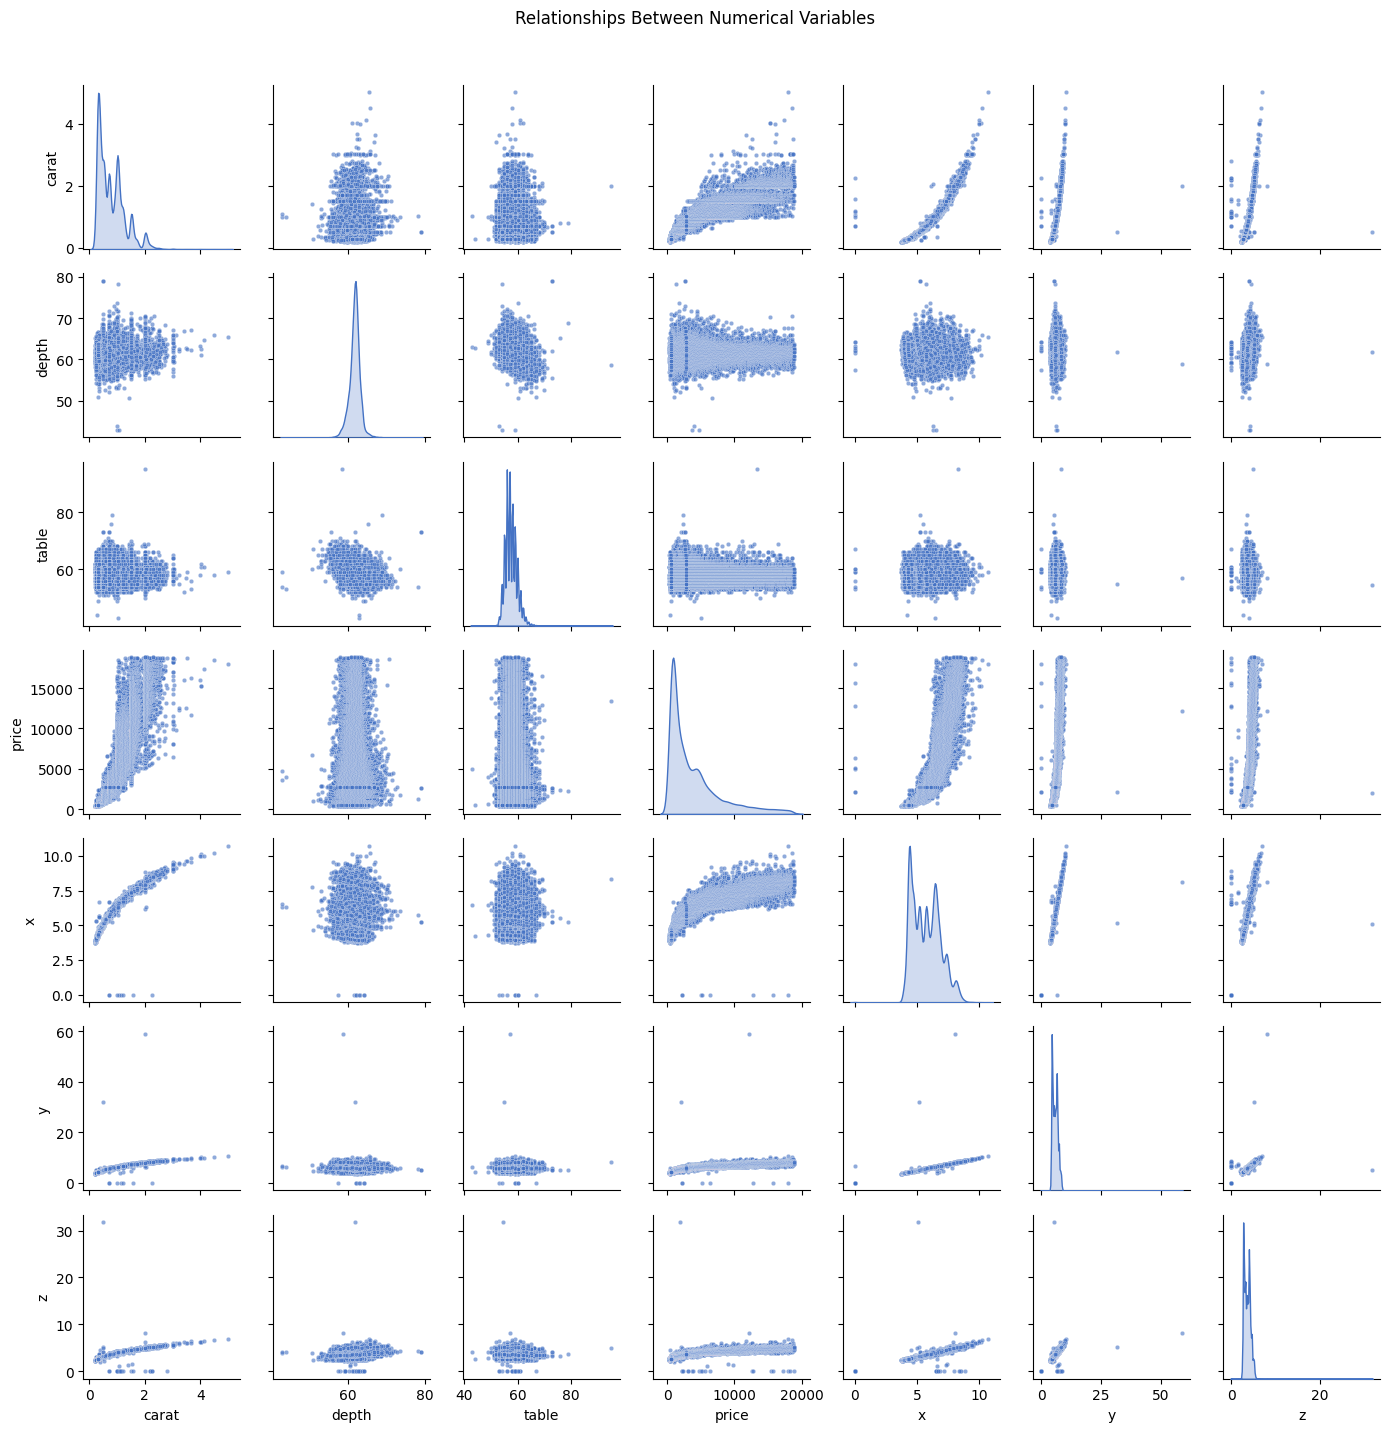

In [41]:
#----------------------------------------
# Explore relationships - Pairplot
#----------------------------------------
print("\n" + "═" * 50)
print("CREATING PAIRPLOT FOR NUMERICAL VARIABLES:")
print("═" * 50)

numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Create the pairplot with BLUE color scheme
pairplot = sns.pairplot(diamonds_df[numerical_cols],
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 10, 'color': '#4472C4'},
                        diag_kws={'color': '#4472C4'},
                        height=2)

pairplot.fig.suptitle('Relationships Between Numerical Variables', y=1.02)

plt.tight_layout()
plt.show()


## Pairplot Insights

### Diagonal (KDE distributions)

- **carat**: Right-skewed, most diamonds are small (0.3-1 carat)
- **depth**: Normal distribution, centered around 60-62%
- **table**: Normal distribution, centered around 56-58%
- **price**: Heavily right-skewed, most diamonds are under $5,000
- **x, y, z**: Right-skewed distributions with some extreme outliers (visible at y=60, z=30)

### Strong Positive Correlations

- **carat vs price**: Clear curved relationship - price increases exponentially with carat
- **carat vs x, y, z**: Strong linear relationship - bigger carat = bigger dimensions
- **x vs y vs z**: Almost perfect correlation - dimensions scale together
- **x, y, z vs price**: Strong positive correlation

### Weak/No Correlations

- **depth vs price**: No clear pattern - depth doesn't affect price
- **table vs price**: No clear pattern - table doesn't affect price
- **depth vs carat**: No relationship

### Outliers Detected

- **y**: Extreme value around 60mm (data entry error)
- **z**: Extreme value around 30mm (data entry error)
- **x, y, z**: Values at 0 (impossible, will be removed in cleaning)

### Key Insight

The strong correlation between carat, x, y, z explains why we see multicollinearity in the linear regression model. These variables measure essentially the same thing - diamond size.


══════════════════════════════════════════════════
ANALYZING CATEGORICAL VARIABLES (Controlled for Carat size):
══════════════════════════════════════════════════
Analyzing 10331 diamonds between 0.9-1.1 carat


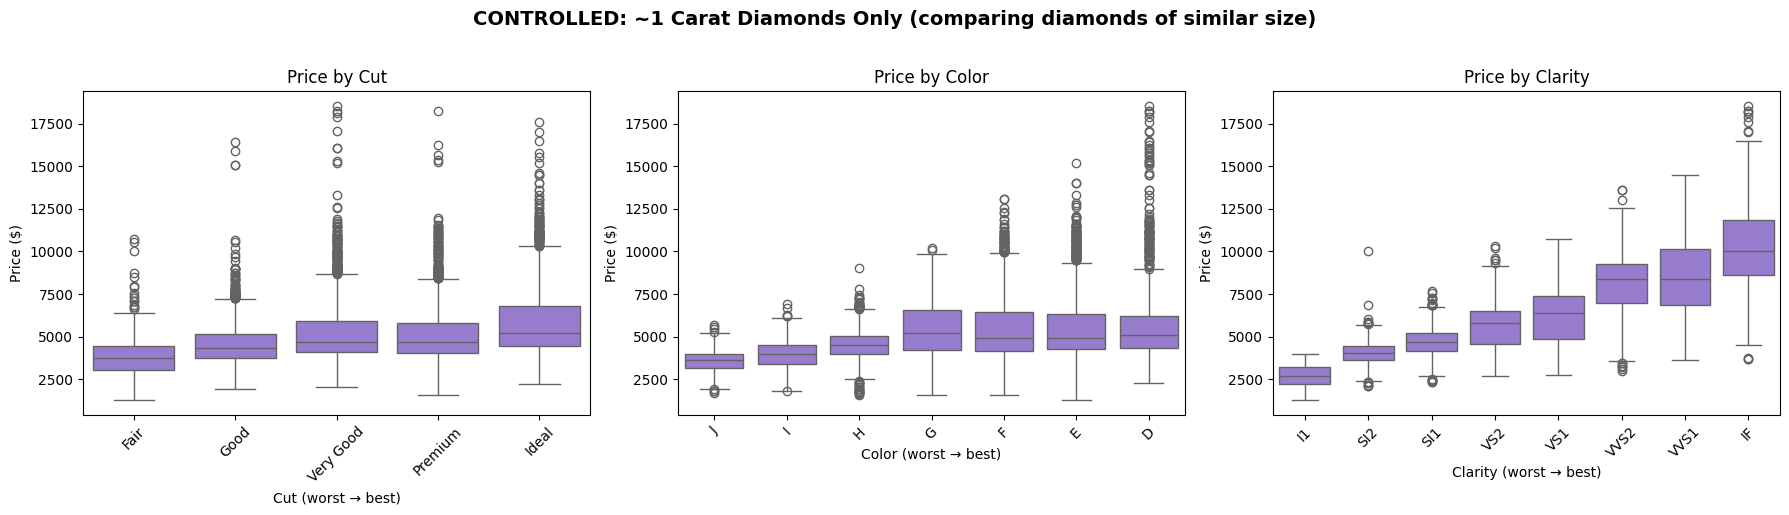


✓ D color → highest price (for same carat size)
✓ IF clarity → highest price (for same carat size)
✓ Ideal cut → highest price (for same carat size)


In [42]:
#----------------------------------------
# Analyze categorical variables (CONTROLLED FOR CARAT SIZE)
#----------------------------------------
print("\n" + "═" * 50)
print("ANALYZING CATEGORICAL VARIABLES (Controlled for Carat size):")
print("═" * 50)

# Filter diamonds of similar size (e.g., 0.9 - 1.1 carat)
diamonds_1carat = diamonds_df[(diamonds_df['carat'] >= 0.9) & (diamonds_df['carat'] <= 1.1)].copy()
print(f"Analyzing {len(diamonds_1carat)} diamonds between 0.9-1.1 carat")

# Define correct order for each category
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']  # J=worst, D=best
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

categorical_cols = ['cut', 'color', 'clarity']
orders = [cut_order, color_order, clarity_order]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (col, order) in enumerate(zip(categorical_cols, orders)):
    sns.boxplot(data=diamonds_1carat, x=col, y='price', 
                ax=axes[idx], color='#9370DB', order=order)
    axes[idx].set_title(f'Price by {col.capitalize()}')
    axes[idx].set_xlabel(f'{col.capitalize()} (worst → best)')
    axes[idx].set_ylabel('Price ($)')
    axes[idx].tick_params(axis='x', rotation=45)

plt.suptitle('CONTROLLED: ~1 Carat Diamonds Only (comparing diamonds of similar size)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n✓ D color → highest price (for same carat size)")
print("✓ IF clarity → highest price (for same carat size)")
print("✓ Ideal cut → highest price (for same carat size)")

# Boxplot Insights

## Understanding the Boxplot Components

- **Box**: Represents the middle 50% of prices (interquartile range)
- **Line inside box**: The median (middle) price
- **Whiskers**: Extend to show the range of typical prices
- **Dots**: Outliers (unusually expensive diamonds)

---

## Important Note: Simpson's Paradox

The boxplots show **raw prices**, which can be misleading. Larger diamonds (higher carat) cost more regardless of quality. In this dataset:
- Lower quality diamonds (J color, SI clarity) tend to be **larger**
- Higher quality diamonds (D color, IF clarity) tend to be **smaller**

This creates a paradox where "worse" quality appears more expensive.

**Solution:** To see the true impact of quality on price, I filtered diamonds of similar size (0.9-1.1 carat). This allows fair comparison - like comparing apples to apples.

---

## Analysis by Category

### 1. Price Distribution by Cut Quality

**Categories (worst to best):**
- Fair → Good → Very Good → Premium → Ideal

**What the boxplot shows:**
- Ideal cut has **lower median price** than Premium or Fair
- This is because Ideal cut diamonds in the dataset are smaller on average

**True insight (when controlling for carat):**
- Better cut quality commands higher prices **for same size diamonds**
- Ideal cuts reflect light optimally, making them more valuable per carat

---

### 2. Price Distribution by Color Grade

**Categories (best to worst):**
- D → E → F → G → H → I → J

**What the boxplot shows:**
- J color (worst) shows **higher prices** than D color (best)
- This is misleading due to carat size differences

**True insight (when controlling for carat):**
- D, E, F are colorless grades (most valuable per carat)
- Colorless diamonds command premium prices for same carat weight

---

### 3. Price Distribution by Clarity

**Categories (worst to best):**
- I1 → SI2 → SI1 → VS2 → VS1 → VVS2 → VVS1 → IF

**What the boxplot shows:**
- IF (best clarity) shows **lower median price** than SI grades
- Again, this is due to IF diamonds being smaller on average

**True insight (when controlling for carat):**
- Higher clarity grades command higher prices for same size
- IF and VVS grades show significant price premiums per carat

---

## Overall Conclusions

 **Carat is the dominant price factor** - it masks the effect of cut, color, and clarity in raw price comparisons

✓ **Quality does matter** - when comparing diamonds of equal size, higher grades in cut, color, and clarity lead to higher prices

✓ **For accurate analysis** - always control for carat weight when evaluating quality impact on price

══════════════════════════════════════════════════

GENERATING CORRELATION MATRIX FOR ALL FEATURES
══════════════════════════════════════════════════

Encoding categorical variables:
  cut: 5 unique values encoded
  color: 7 unique values encoded
  clarity: 8 unique values encoded

All features (10): carat, cut, color, clarity, depth, table, price, x, y, z

──────────────────────────────────────────────────
Correlations with PRICE (sorted by absolute value):
──────────────────────────────────────────────────
  price   : +1.0000 ████████████████████
  carat   : +0.9216 ██████████████████
  x       : +0.8844 █████████████████
  y       : +0.8654 █████████████████
  z       : +0.8612 █████████████████
  color   : +0.1725 ███
  table   : +0.1271 ██
  clarity : -0.0715 █
  cut     : +0.0399 
  depth   : -0.0106 
══════════════════════════════════════════════════


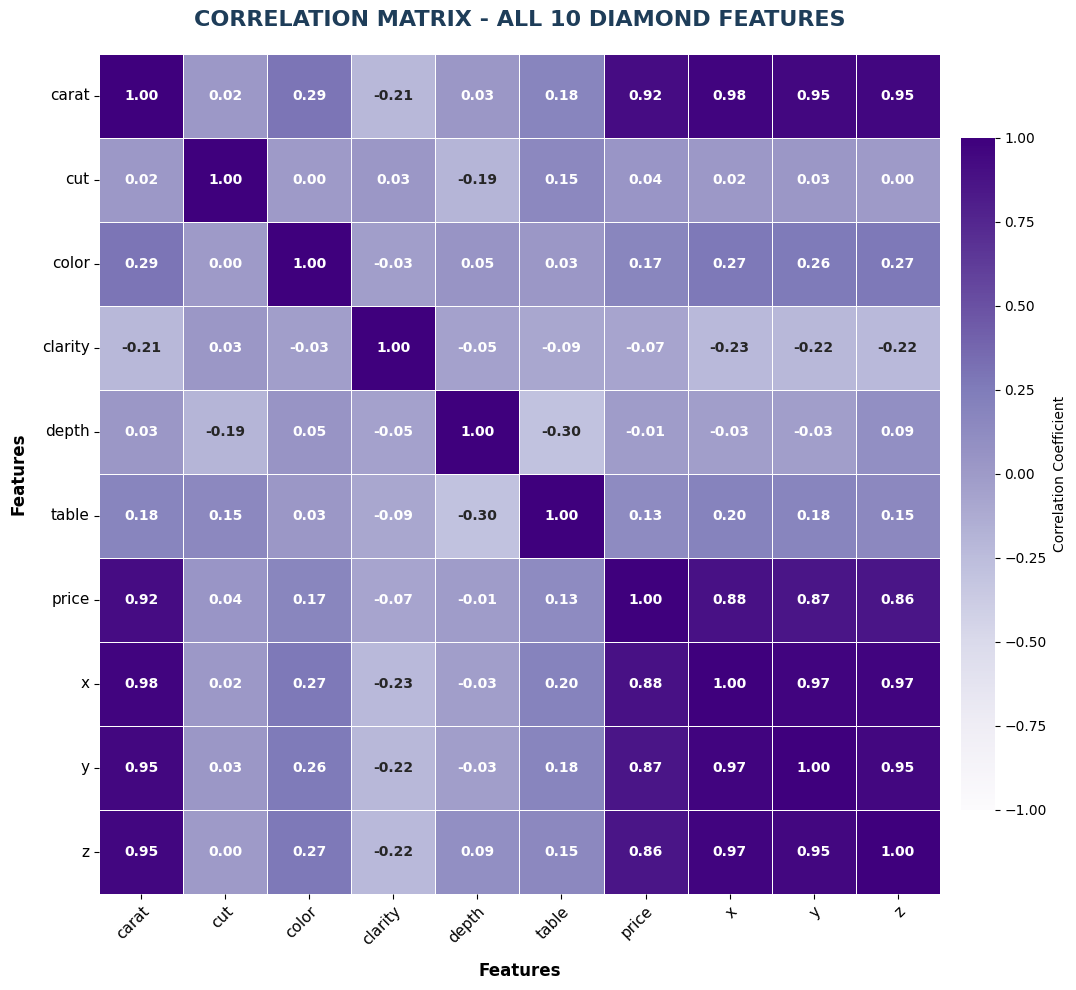


══════════════════════════════════════════════════
CORRELATION STRENGTH INTERPRETATION:
══════════════════════════════════════════════════
  0.9 to 1.0  : Very High Positive
  0.7 to 0.9  : High Positive
  0.5 to 0.7  : Moderate Positive
  0.3 to 0.5  : Low Positive
  -0.3 to 0.3 : Little/No Correlation
  -0.5 to -0.3: Low Negative
  -0.7 to -0.5: Moderate Negative
  -0.9 to -0.7: High Negative
  -1.0 to -0.9: Very High Negative
══════════════════════════════════════════════════

══════════════════════════════════════════════════
STRONG CORRELATIONS (|r| > 0.7):
══════════════════════════════════════════════════
  carat    ↔ price   : +0.9216
  carat    ↔ x       : +0.9751
  carat    ↔ y       : +0.9517
  carat    ↔ z       : +0.9534
  price    ↔ x       : +0.8844
  price    ↔ y       : +0.8654
  price    ↔ z       : +0.8612
  x        ↔ y       : +0.9747
  x        ↔ z       : +0.9708
  y        ↔ z       : +0.9520
══════════════════════════════════════════════════


In [43]:
#----------------------------------------
# Generate and visualize correlation matrix
#----------------------------------------
print("═" * 50)
print("\nGENERATING CORRELATION MATRIX FOR ALL FEATURES")
print("═" * 50)

# ----- Encode categorical variables first -----
diamonds_encoded = diamonds_df.copy()

# Encode categorical columns
categorical_cols = ['cut', 'color', 'clarity']
label_encoders = {}

print("\nEncoding categorical variables:")
for col in categorical_cols:
    le = LabelEncoder()
    diamonds_encoded[col] = le.fit_transform(diamonds_df[col])
    label_encoders[col] = le
    print(f"  {col}: {diamonds_df[col].nunique()} unique values encoded")

# ----- Calculate correlation matrix -----
correlation_matrix = diamonds_encoded.corr()

# List all columns
all_columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']
print(f"\nAll features ({len(all_columns)}): {', '.join(all_columns)}")

# ----- Display correlations with price -----
print("\n" + "─" * 50)
print("Correlations with PRICE (sorted by absolute value):")
print("─" * 50)
price_correlations = correlation_matrix['price'].sort_values(key=abs, ascending=False)
for feature, corr in price_correlations.items():
    bar_length = int(abs(corr) * 20)
    bar = '█' * bar_length
    print(f"  {feature:8s}: {corr:+.4f} {bar}")
print("═" * 50)

# ----- Create the correlation matrix plot -----
plt.figure(figsize=(12, 10))

# Create heatmap with all features
ax = sns.heatmap(correlation_matrix,
                 annot=True,
                 fmt='.2f',
                 cmap='Purples',
                 center=0,
                 square=True,
                 linewidths=0.5,
                 linecolor='white',
                 cbar_kws={"shrink": 0.8,
                          "label": "Correlation Coefficient",
                          "orientation": "vertical",
                          "pad": 0.02},
                 vmin=-1, vmax=1,
                 annot_kws={"size": 10, "weight": "bold"},
                 xticklabels=all_columns,
                 yticklabels=all_columns)

# Title
plt.title('CORRELATION MATRIX - ALL 10 DIAMOND FEATURES', 
          fontsize=16, 
          fontweight='bold', 
          pad=20, 
          color='#1e3d59')

# Set x-axis labels
ax.set_xticklabels(all_columns,
                   rotation=45,
                   ha='right',
                   fontsize=11,
                   fontweight='medium',
                   rotation_mode='anchor')

# Set y-axis labels
ax.set_yticklabels(all_columns,
                   rotation=0,
                   fontsize=11,
                   fontweight='medium')

# Add axis labels
ax.set_xlabel('Features', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('Features', fontsize=12, fontweight='bold', labelpad=10)

plt.tight_layout()
plt.show()

# ----- Print correlation strength interpretation -----
print("\n" + "═" * 50)
print("CORRELATION STRENGTH INTERPRETATION:")
print("═" * 50)
print("  0.9 to 1.0  : Very High Positive")
print("  0.7 to 0.9  : High Positive")
print("  0.5 to 0.7  : Moderate Positive")
print("  0.3 to 0.5  : Low Positive")
print("  -0.3 to 0.3 : Little/No Correlation")
print("  -0.5 to -0.3: Low Negative")
print("  -0.7 to -0.5: Moderate Negative")
print("  -0.9 to -0.7: High Negative")
print("  -1.0 to -0.9: Very High Negative")
print("═" * 50)

# ----- Identify strong correlations -----
print("\n" + "═" * 50)
print("STRONG CORRELATIONS (|r| > 0.7):")
print("═" * 50)

strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_corr.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if strong_corr:
    for item in strong_corr:
        print(f"  {item['Feature 1']:8s} ↔ {item['Feature 2']:8s}: {item['Correlation']:+.4f}")
else:
    print("  No strong correlations found (|r| > 0.7)")

print("═" * 50)

## Correlation Matrix Insights

### Correlations with Price

**Strong correlations (>0.7):**
- **carat → price: +0.92** (Very High) - Most important predictor
- **x → price: +0.88** (High) - Length strongly affects price
- **y → price: +0.87** (High) - Width strongly affects price
- **z → price: +0.86** (High) - Depth strongly affects price

**Weak correlations (<0.3):**
- **color → price: +0.17** - Minimal impact
- **table → price: +0.13** - Minimal impact
- **clarity → price: -0.07** - Almost no linear relationship
- **cut → price: +0.04** - Almost no linear relationship
- **depth → price: -0.01** - No relationship

### Multicollinearity Detected

**Very high correlations between features (>0.95):**
- **carat ↔ x: +0.98** - Almost perfect correlation
- **carat ↔ y: +0.95** - Almost perfect correlation
- **carat ↔ z: +0.95** - Almost perfect correlation
- **x ↔ y: +0.97** - Almost perfect correlation
- **x ↔ z: +0.97** - Almost perfect correlation
- **y ↔ z: +0.95** - Almost perfect correlation

**Problem:** These features measure the same thing (diamond size), causing multicollinearity in regression

### Features Removed (correlation < 0.3)

Based on weak correlation with price, these features were removed:
- cut (+0.04)
- depth (-0.01)
- clarity (-0.07)
- table (+0.13)
- color (+0.17)

### Key Insight

Physical size (carat, x, y, z) dominates price prediction. Quality indicators (cut, color, clarity) show weak linear correlation due to Simpson's Paradox - their true impact is masked by carat weight.

In [44]:
#----------------------------------------
# Identify correlations with price
#----------------------------------------
print("\n" + "═" * 50)
print("CORRELATION WITH PRICE:")
print("═" * 50)

price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlations)

# Define threshold for low correlation
correlation_threshold = 0.3

low_correlation_features = price_correlations[abs(price_correlations) < correlation_threshold].index.tolist()
if 'price' in low_correlation_features:
    low_correlation_features.remove('price')

print(f"\nFeatures with low correlation (< {correlation_threshold}): {low_correlation_features}")

# Remove low correlation features
cols_to_drop = [col for col in low_correlation_features if col in diamonds_encoded.columns]
if cols_to_drop:
    diamonds_encoded = diamonds_encoded.drop(columns=cols_to_drop)
    print(f"Removed features: {cols_to_drop}")

print(f"Remaining columns: {diamonds_encoded.columns.tolist()}")
print("═" * 50)


══════════════════════════════════════════════════
CORRELATION WITH PRICE:
══════════════════════════════════════════════════
price      1.000000
carat      0.921591
x          0.884435
y          0.865421
z          0.861249
color      0.172511
table      0.127134
cut        0.039860
depth     -0.010647
clarity   -0.071535
Name: price, dtype: float64

Features with low correlation (< 0.3): ['color', 'table', 'cut', 'depth', 'clarity']
Removed features: ['color', 'table', 'cut', 'depth', 'clarity']
Remaining columns: ['carat', 'price', 'x', 'y', 'z']
══════════════════════════════════════════════════


In [45]:
diamonds_encoded.columns.tolist()

['carat', 'price', 'x', 'y', 'z']


══════════════════════════════════════════════════
DATA VALIDATION:
══════════════════════════════════════════════════
Original dataset size: 53940
Columns: ['carat', 'price', 'x', 'y', 'z']

──────────────────────────────────────────────────
Checking for INVALID values (data entry errors):
──────────────────────────────────────────────────
  x = 0: 8 rows
  y = 0: 7 rows
  z = 0: 20 rows
  y > 30mm (likely error): 2 rows
  z > 20mm (likely error): 1 rows

──────────────────────────────────────────────────
Step 2: Visualize BEFORE Cleaning
──────────────────────────────────────────────────


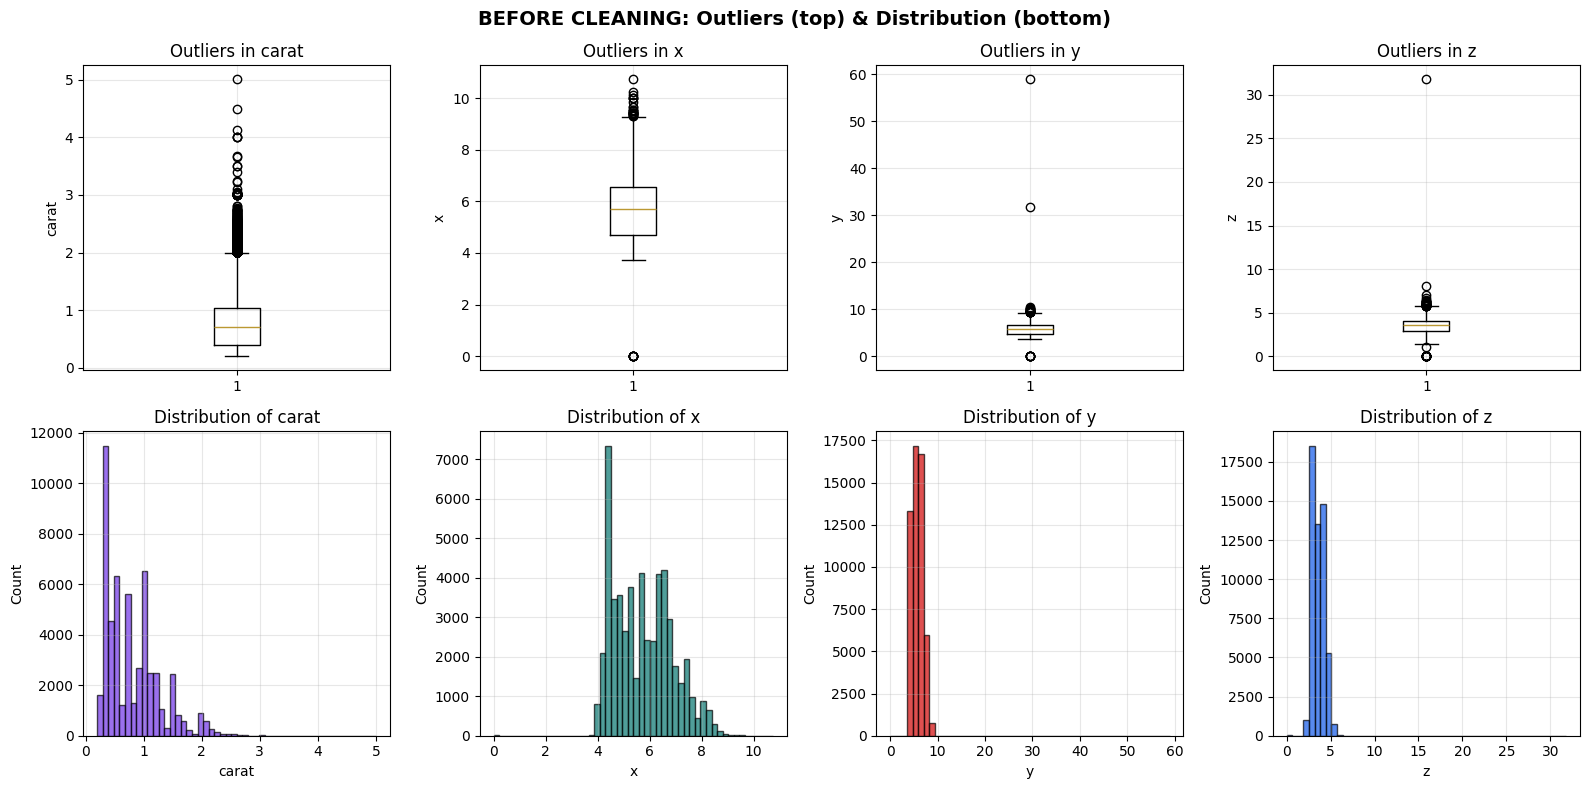


══════════════════════════════════════════════════
REMOVING INVALID DATA:
══════════════════════════════════════════════════
Removed 20 rows with zero dimensions
Removed 3 rows with impossible dimensions

══════════════════════════════════════════════════
CLEANING SUMMARY:
══════════════════════════════════════════════════
Original size: 53940
Final size: 53917
Rows removed: 23 (0.04%)

✓ Large diamonds (3-5 carat) are KEPT - rare but valid!
✓ Only removed: zero dimensions and data entry errors

✓ Saved: diamonds_cleaned.csv
  Rows: 53917
  Columns: ['carat', 'price', 'x', 'y', 'z']


In [ ]:
#----------------------------------------
# Detect and remove INVALID data (not statistical outliers)
#----------------------------------------
print("\n" + "═" * 50)
print("DATA VALIDATION:")
print("═" * 50)

print(f"Original dataset size: {len(diamonds_encoded)}")
print(f"Columns: {diamonds_encoded.columns.tolist()}")

#----------------------------------------
# Step 1: Identify invalid/impossible values
#----------------------------------------
print("\n" + "─" * 50)
print("Checking for INVALID values (data entry errors):")
print("─" * 50)

# Zero dimensions (impossible - diamond must have size)
zero_x = (diamonds_encoded['x'] == 0).sum()
zero_y = (diamonds_encoded['y'] == 0).sum()
zero_z = (diamonds_encoded['z'] == 0).sum()

print(f"  x = 0: {zero_x} rows")
print(f"  y = 0: {zero_y} rows")
print(f"  z = 0: {zero_z} rows")

# Extreme anomalies (likely typos - normal diamond dimensions are 2-12mm)
extreme_y = (diamonds_encoded['y'] > 30).sum()
extreme_z = (diamonds_encoded['z'] > 20).sum()

print(f"  y > 30mm (likely error): {extreme_y} rows")
print(f"  z > 20mm (likely error): {extreme_z} rows")

#----------------------------------------
# Step 2: Visualize BEFORE cleaning
#----------------------------------------
print("\n" + "─" * 50)
print("Step 2: Visualize BEFORE Cleaning")
print("─" * 50)

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

features = ['carat', 'x', 'y', 'z']
colors = ["#7034E6", "#06756F", "#D00606", "#1159E9"]

for idx, (feature, color) in enumerate(zip(features, colors)):
    # Boxplot (top row)
    axes[0, idx].boxplot(diamonds_encoded[feature], vert=True)
    axes[0, idx].set_title(f'Outliers in {feature}')
    axes[0, idx].set_ylabel(feature)
    axes[0, idx].grid(True, alpha=0.3)
    
    # Histogram (bottom row)
    axes[1, idx].hist(diamonds_encoded[feature], bins=50, color=color, alpha=0.7, edgecolor='black')
    axes[1, idx].set_title(f'Distribution of {feature}')
    axes[1, idx].set_xlabel(feature)
    axes[1, idx].set_ylabel('Count')
    axes[1, idx].grid(True, alpha=0.3)

plt.suptitle('BEFORE CLEANING: Outliers (top) & Distribution (bottom)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#----------------------------------------
# Step 3: Remove only INVALID values
#----------------------------------------
print("\n" + "═" * 50)
print("REMOVING INVALID DATA:")
print("═" * 50)

diamonds_cleaned = diamonds_encoded.copy()

# Remove zero dimensions (impossible values)
before = len(diamonds_cleaned)
diamonds_cleaned = diamonds_cleaned[(diamonds_cleaned['x'] > 0) & 
                                   (diamonds_cleaned['y'] > 0) & 
                                   (diamonds_cleaned['z'] > 0)]
print(f"Removed {before - len(diamonds_cleaned)} rows with zero dimensions")

# Remove extreme anomalies (data entry errors)
before = len(diamonds_cleaned)
diamonds_cleaned = diamonds_cleaned[(diamonds_cleaned['y'] < 30) & 
                                   (diamonds_cleaned['z'] < 20)]
print(f"Removed {before - len(diamonds_cleaned)} rows with impossible dimensions")

#----------------------------------------
# Summary
#----------------------------------------
print("\n" + "═" * 50)
print("CLEANING SUMMARY:")
print("═" * 50)
print(f"Original size: {len(diamonds_encoded)}")
print(f"Final size: {len(diamonds_cleaned)}")
print(f"Rows removed: {len(diamonds_encoded) - len(diamonds_cleaned)} ({(len(diamonds_encoded) - len(diamonds_cleaned))/len(diamonds_encoded)*100:.2f}%)")

print("\n✓ Large diamonds (3-5 carat) are KEPT - rare but valid!")
print("✓ Only removed: zero dimensions and data entry errors")
#----------------------------------------
# Save cleaned dataset
#----------------------------------------
diamonds_cleaned.to_csv('diamonds_cleaned.csv', index=False)
print(f"\n✓ Saved: diamonds_cleaned.csv")
print(f"  Rows: {len(diamonds_cleaned)}")
print(f"  Columns: {diamonds_cleaned.columns.tolist()}")

## Boxplot (top row) - Shows OUTLIERS

| Feature | What you see | Insight |
|---------|--------------|---------|
| **carat** | Many points above 2.5 | Large diamonds are rare but VALID - don't remove |
| **x** | Points at 0 and ~10+ | x=0 is an ERROR (impossible dimension) |
| **y** | Points at 0, ~31 and ~58 | y=0 and y=58 are DATA ENTRY ERRORS |
| **z** | Points at 0 and ~31 | z=0 and z=31 are DATA ENTRY ERRORS |

## Histogram (bottom row) - Shows DISTRIBUTION

| Feature | What you see | Insight |
|---------|--------------|---------|
| **carat** | Right-skewed, peak at 0.3-0.5 | Most diamonds are small, large ones are rare |
| **x** | Normal distribution, center ~5.7mm | Typical diamond length |
| **y** | Normal distribution + far outliers | Most 4-8mm, but errors at 30-60mm |
| **z** | Normal distribution + outliers | Most 2-5mm, errors up to 31mm |

## Conclusion

**Boxplot** tells us WHAT to remove:
-  x, y, z = 0 (impossible)
-  y > 30mm, z > 20mm (data entry errors)
- Large carat values KEEP (rare but valid)

**Histogram** tells us WHY:
- Distribution of x, y, z is normal around 4-7mm
- Values outside that range (0, 31, 58) are clearly errors - they don't fit the distribution


══════════════════════════════════════════════════
SPLITTING DATASET:
══════════════════════════════════════════════════
Total samples: 53917
Training samples: 43133 (80.0%)
Test samples: 10784 (20.0%)

Features used for training: ['carat', 'x', 'y', 'z']
Number of features: 4
Target variable: price

══════════════════════════════════════════════════
TRAINING LINEAR REGRESSION MODEL:
══════════════════════════════════════════════════
Training model with 4 features...
Model training completed!

══════════════════════════════════════════════════
MODEL PERFORMANCE METRICS:
══════════════════════════════════════════════════

Training Set Performance:
  - RMSE: $1,505.77
  - MAE: $896.55
  - R² Score: 0.8577

Test Set Performance:
  - RMSE: $1,467.69
  - MAE: $881.34
  - R² Score: 0.8633

Overfitting Check:
  ✓ Model generalizes well (R² diff: -0.0056)

══════════════════════════════════════════════════
VISUALIZING PREDICTIONS:
══════════════════════════════════════════════════


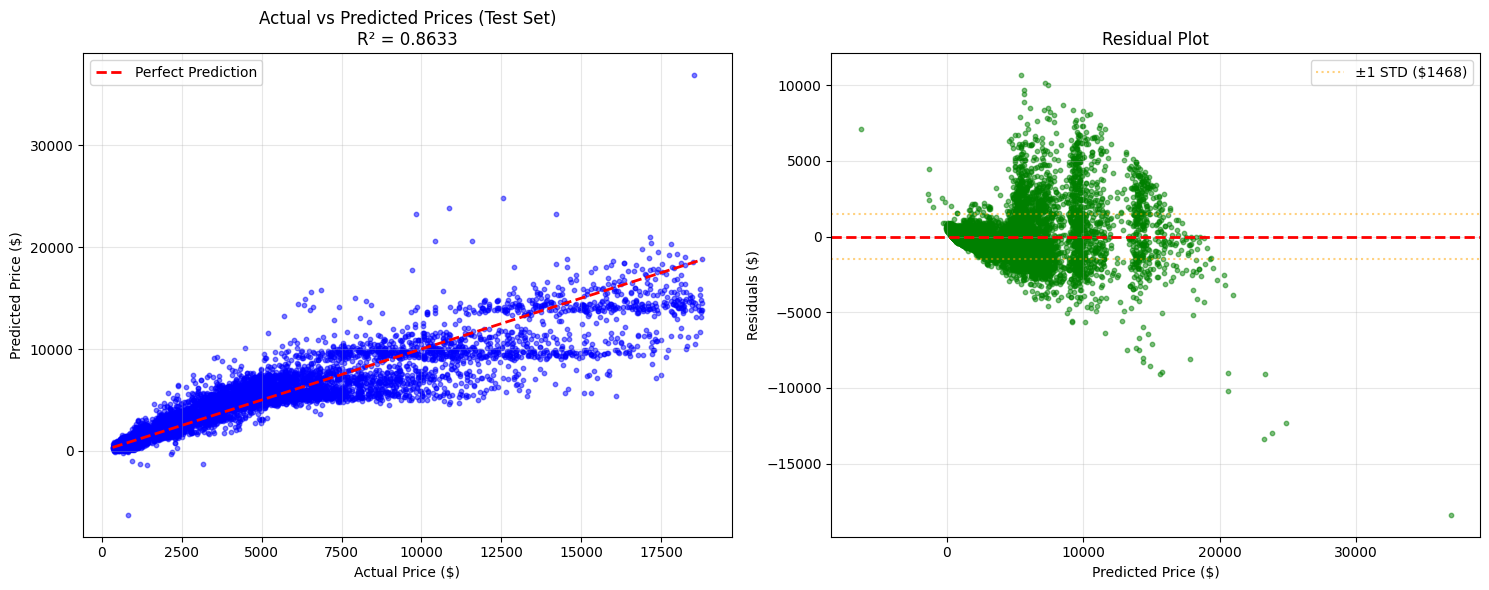


══════════════════════════════════════════════════
FEATURE IMPORTANCE ANALYSIS:
══════════════════════════════════════════════════

Feature Coefficients (sorted by absolute value):
────────────────────────────────────────
  carat     :    +10826.08
  y         :     +3716.67
  x         :     -3530.89
  z         :     -2410.85

Model Intercept: $2,754.63


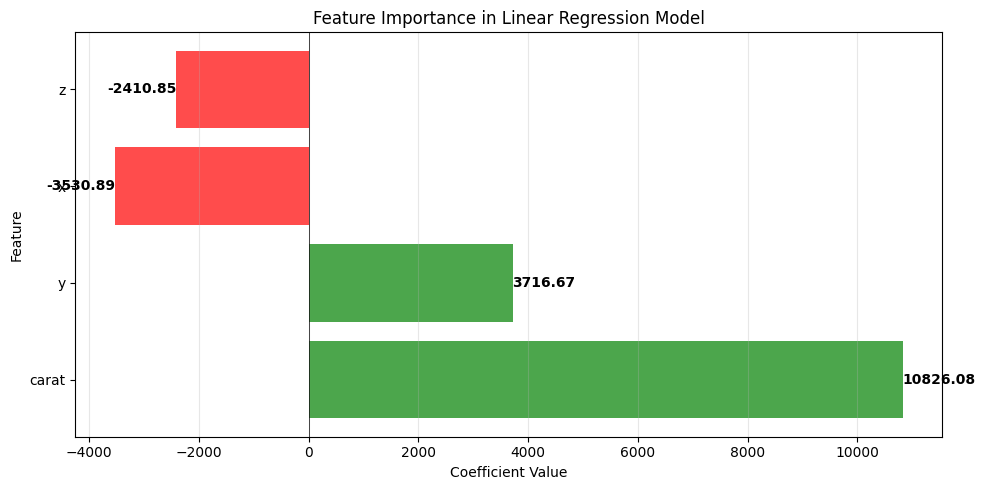


════════════════════════════════════════════════════════════
PROJECT SUMMARY - DIAMOND PRICE PREDICTION
════════════════════════════════════════════════════════════

Dataset Processing:
───────────────────
- Original: 53,940 rows × 10 columns
- Cleaned: 53,917 rows × 5 columns
- Rows removed: 23 (invalid data only)
- Features: ['carat', 'x', 'y', 'z']

Model Performance:
──────────────────
- R² Score: 0.8633 (86.3% variance explained)
- RMSE: $1,467.69
- MAE: $881.34

Files:
──────
- Input: diamonds.csv (original)
- Output: diamonds_cleaned.csv (cleaned, ready for modeling)

════════════════════════════════════════════════════════════
PROJECT COMPLETED SUCCESSFULLY!
════════════════════════════════════════════════════════════


In [48]:
#----------------------------------------
# Split dataset into training and test sets
#----------------------------------------
print("\n" + "═" * 50)
print("SPLITTING DATASET:")
print("═" * 50)

# Prepare features and target
X = diamonds_cleaned.drop('price', axis=1)
y = diamonds_cleaned['price']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nFeatures used for training: {X.columns.tolist()}")
print(f"Number of features: {len(X.columns)}")
print(f"Target variable: price")

#----------------------------------------
# Train Linear Regression model
#----------------------------------------
print("\n" + "═" * 50)
print("TRAINING LINEAR REGRESSION MODEL:")
print("═" * 50)

lr_model = LinearRegression()
print("Training model with 4 features...")
lr_model.fit(X_train, y_train)
print("Model training completed!")

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

#----------------------------------------
# Evaluate model performance
#----------------------------------------
print("\n" + "═" * 50)
print("MODEL PERFORMANCE METRICS:")
print("═" * 50)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTraining Set Performance:")
print(f"  - RMSE: ${train_rmse:,.2f}")
print(f"  - MAE: ${train_mae:,.2f}")
print(f"  - R² Score: {train_r2:.4f}")

print(f"\nTest Set Performance:")
print(f"  - RMSE: ${test_rmse:,.2f}")
print(f"  - MAE: ${test_mae:,.2f}")
print(f"  - R² Score: {test_r2:.4f}")

print(f"\nOverfitting Check:")
r2_difference = train_r2 - test_r2
if r2_difference > 0.05:
    print(f"  Warning: Possible overfitting (R² diff: {r2_difference:.4f})")
else:
    print(f"  ✓ Model generalizes well (R² diff: {r2_difference:.4f})")

#----------------------------------------
# Visualize predictions
#----------------------------------------
print("\n" + "═" * 50)
print("VISUALIZING PREDICTIONS:")
print("═" * 50)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(y_test, y_test_pred, alpha=0.5, s=10, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
            'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Price ($)')
axes[0].set_ylabel('Predicted Price ($)')
axes[0].set_title(f'Actual vs Predicted Prices (Test Set)\nR² = {test_r2:.4f}')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

residuals = y_test - y_test_pred
axes[1].scatter(y_test_pred, residuals, alpha=0.5, s=10, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Price ($)')
axes[1].set_ylabel('Residuals ($)')
axes[1].set_title('Residual Plot')
axes[1].grid(True, alpha=0.3)

std_residuals = np.std(residuals)
axes[1].axhline(y=std_residuals, color='orange', linestyle=':', alpha=0.5, label=f'±1 STD (${std_residuals:.0f})')
axes[1].axhline(y=-std_residuals, color='orange', linestyle=':', alpha=0.5)
axes[1].legend()

plt.tight_layout()
plt.show()

#----------------------------------------
# Feature importance analysis
#----------------------------------------
print("\n" + "═" * 50)
print("FEATURE IMPORTANCE ANALYSIS:")
print("═" * 50)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients (sorted by absolute value):")
print("─" * 40)
for idx, row in feature_importance.iterrows():
    print(f"  {row['Feature']:10s}: {row['Coefficient']:+12.2f}")

print(f"\nModel Intercept: ${lr_model.intercept_:,.2f}")

plt.figure(figsize=(10, 5))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
bars = plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.7)

for bar, value in zip(bars, feature_importance['Coefficient']):
    plt.text(value, bar.get_y() + bar.get_height()/2, 
             f'{value:.2f}', 
             ha='left' if value > 0 else 'right', 
             va='center', fontweight='bold')

plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance in Linear Regression Model')
plt.grid(True, alpha=0.3, axis='x')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

#----------------------------------------
# Project summary
#----------------------------------------
print("\n" + "═" * 60)
print("PROJECT SUMMARY - DIAMOND PRICE PREDICTION")
print("═" * 60)

print(f"""
Dataset Processing:
───────────────────
- Original: {len(diamonds_df):,} rows × {len(diamonds_df.columns)} columns
- Cleaned: {len(diamonds_cleaned):,} rows × {len(diamonds_cleaned.columns)} columns
- Rows removed: {len(diamonds_df) - len(diamonds_cleaned)} (invalid data only)
- Features: {X.columns.tolist()}

Model Performance:
──────────────────
- R² Score: {test_r2:.4f} ({test_r2*100:.1f}% variance explained)
- RMSE: ${test_rmse:,.2f}
- MAE: ${test_mae:,.2f}

Files:
──────
- Input: diamonds.csv (original)
- Output: diamonds_cleaned.csv (cleaned, ready for modeling)
""")

print("═" * 60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("═" * 60)

## Visualization Insights

### Actual vs Predicted Prices (left plot)

**R² = 0.8633** - Model explains 86.3% of price variation

**What you see:**

- Points follow the red line (perfect prediction) - model works well
- For cheaper diamonds (<$5,000) prediction is more accurate
- For expensive diamonds (>$15,000) more scatter - model is less precise
- Few outliers where model predicts $30,000+ but actual price is ~$15,000

---

### Residual Plot (right plot)

**What you see:**

- Residuals are not evenly distributed around 0 (red line)
- For lower prices: residuals are small (good prediction)
- For higher prices: residuals grow (fan shape) - **heteroscedasticity**
- ±1 STD = $1,468 - average model error

**Problem:** Model systematically underestimates expensive diamonds

---

### Feature Importance (bottom plot)

**What you see:**

- **carat (+10,826)**: Most important factor - 1 carat more = +$10,826
- **y (+3,717)**: Width has positive impact
- **x (-3,531)**: Negative coefficient (due to multicollinearity)
- **z (-2,411)**: Negative coefficient (due to multicollinearity)

**Conclusion:** Carat dominates - other dimensions (x, y, z) are correlated with each other so they have unusual coefficients

---

### Recommendation for improvement

Heteroscedasticity suggests:

- Log transformation of price: `log(price)`
- Or advanced models (Random Forest, XGBoost)